In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = float(tmp_val) - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
class ClassificationTest:
    def __init__(self, x_data, t_data, learning_rate, iteration_count):
        
        # 가중치 W 형상을 자동으로 구하기 위해 입력데이터가 vector 인지,
        # 아니면 matrix 인지 체크 후, 
        # self.xdata 는 무조건 matrix 로 만들어 주면 코드 일관성이 있음
        if x_data.ndim == 1:    # vector
            self.x_data = x_data.reshape(len(x_data), 1)
            self.t_data = t_data.reshape(len(t_data), 1)
        elif x_data.ndim == 2:  # matrix
            self.x_data = x_data
            self.t_data = t_data
        
        self.learning_rate = learning_rate
        self.iteration_count = iteration_count
        
        self.W = np.random.rand(self.x_data.shape[1], 1)
        self.b = np.random.rand(1)
        
        self.loss_val_list = []
        
        print("ClassificationTest Object is created.\n")
        
    def get_W_b(self):
        return self.W, self.b
        
    def __loss_func(self):
        delta = 1e-7
        
        z = np.dot(self.x_data, self.W) + self.b
        y = sigmoid(z)
    
        return -np.sum((self.t_data*np.log10(y + delta)) + ((1 - self.t_data)*np.log10((1 - y) + delta)))
    
    # 손실함수 값 계산 함수
    # 입력변수 x, t : numpy type
    def __loss_val(self):
        delta = 1e-7
        
        z = np.dot(self.x_data, self.W) + self.b
        y = sigmoid(z)
    
        return -np.sum((self.t_data*np.log10(y + delta)) + ((1 - self.t_data)*np.log10((1 - y) + delta)))

    def train(self):
        f = lambda x : self.__loss_func()
        
        print("Initial error value = ", self.__loss_val() , "\n", "Initial W = ", self.W, "\n", ", b = ", self.b)

        start_time = datetime.now()

        for step in range(self.iteration_count):
            self.W -= self.learning_rate * numerical_derivative(f, self.W)
            self.b -= self.learning_rate * numerical_derivative(f, self.b)
            
            if step % (int)(0.05*self.iteration_count) == 0:
                print("step = ", step, "loss value = ", self.__loss_val())
                self.loss_val_list.append(self.__loss_val())
        
        end_time = datetime.now()

        print("")
        print("Elapsed Time => ", end_time - start_time)
        
    def display_lossval_trend(self):
        plt.title('Loss Value Trend')
        plt.xlabel('epochs ( X 1000)')
        plt.ylabel('loss value')
        plt.grid()

        plt.plot(self.loss_val_list, ls='--', lw=2, label='lr={}, epoch={}'.format(self.learning_rate, self.iteration_count))
        plt.legend(loc='best')

        plt.show()
    
    # 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
    # 입력변수 x : numpy type
    def predict(self, test_data):
        z = np.dot(test_data, self.W) + self.b
        y = sigmoid(z)
        
        if y >= 0.5:
            result = 1
        else:
            result = 0
    
        return y, result

In [5]:
try:
    x_data = np.array([2, 4, 4, 11, 6, 6, 8, 5, 10, 7, 12, 16, 14, 8, 16, 3, 18, 7]).reshape(9, 2)
    t_data = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1]).reshape(9, 1)

    print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape)
    print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape) 

except FileNotFoundError as err:
    print(str(err))
except IndexError as err:
    print(str(err))
except Exception as err:
    print(str(err))

x_data.ndim =  2 , x_data.shape =  (9, 2)
t_data.ndim =  2 , t_data.shape =  (9, 1)


In [6]:
obj1 = ClassificationTest(x_data, t_data, 1e-1, 20001)
obj1.train()

ClassificationTest Object is created.

Initial error value =  13.89220746760033 
 Initial W =  [[0.5488135 ]
 [0.71518937]] 
 , b =  [0.60276338]
step =  0 loss value =  15.314584792668047
step =  20 loss value =  6.9878078506969645
step =  40 loss value =  4.9857036887036505
step =  60 loss value =  6.085276965614443
step =  80 loss value =  4.494624168141165
step =  100 loss value =  5.130741491611701
step =  120 loss value =  4.3160289226220945
step =  140 loss value =  4.005363134126211
step =  160 loss value =  3.7533159714846134
step =  180 loss value =  3.481776261236963
step =  200 loss value =  3.223840650468413
step =  220 loss value =  2.977577700752557
step =  240 loss value =  2.741414502061187
step =  260 loss value =  2.5144630541498993
step =  280 loss value =  2.296537391132243
step =  300 loss value =  2.0881209743257534
step =  320 loss value =  1.8902280694479183
step =  340 loss value =  1.7041275809253023
step =  360 loss value =  1.530914240852937
step =  380 los

step =  3700 loss value =  0.09715259654220014
step =  3720 loss value =  0.09685330106295587
step =  3740 loss value =  0.09655582018313388
step =  3760 loss value =  0.09626013751514072
step =  3780 loss value =  0.0959662368690933
step =  3800 loss value =  0.09567410224979069
step =  3820 loss value =  0.09538371785375857
step =  3840 loss value =  0.09509506806634357
step =  3860 loss value =  0.0948081374588396
step =  3880 loss value =  0.09452291078572948
step =  3900 loss value =  0.09423937298191282
step =  3920 loss value =  0.09395750916000575
step =  3940 loss value =  0.0936773046077067
step =  3960 loss value =  0.0933987447851959
step =  3980 loss value =  0.09312181532257127
step =  4000 loss value =  0.09284650201735513
step =  4020 loss value =  0.09257279083204718
step =  4040 loss value =  0.09230066789166964
step =  4060 loss value =  0.09203011948142577
step =  4080 loss value =  0.09176113204436483
step =  4100 loss value =  0.09149369217908851
step =  4120 loss

step =  7360 loss value =  0.06192505941793461
step =  7380 loss value =  0.06180202620775614
step =  7400 loss value =  0.06167947610620985
step =  7420 loss value =  0.0615574062920558
step =  7440 loss value =  0.061435813965876926
step =  7460 loss value =  0.061314696349886844
step =  7480 loss value =  0.06119405068771265
step =  7500 loss value =  0.06107387424418161
step =  7520 loss value =  0.06095416430513117
step =  7540 loss value =  0.060834918177202185
step =  7560 loss value =  0.06071613318763151
step =  7580 loss value =  0.060597806684081414
step =  7600 loss value =  0.060479936034419556
step =  7620 loss value =  0.06036251862654239
step =  7640 loss value =  0.0602455518681742
step =  7660 loss value =  0.06012903318669056
step =  7680 loss value =  0.06001296002892461
step =  7700 loss value =  0.059897329860984824
step =  7720 loss value =  0.059782140168083614
step =  7740 loss value =  0.05966738845434774
step =  7760 loss value =  0.05955307224264688
step =  

step =  10900 loss value =  0.045756533125849576
step =  10920 loss value =  0.04568897971048288
step =  10940 loss value =  0.04562162404993693
step =  10960 loss value =  0.04555446528160865
step =  10980 loss value =  0.04548750254788787
step =  11000 loss value =  0.04542073499612125
step =  11020 loss value =  0.04535416177857258
step =  11040 loss value =  0.045287782052384616
step =  11060 loss value =  0.04522159497955725
step =  11080 loss value =  0.04515559972689602
step =  11100 loss value =  0.0450897954659863
step =  11120 loss value =  0.04502418137316348
step =  11140 loss value =  0.04495875662947165
step =  11160 loss value =  0.04489352042062814
step =  11180 loss value =  0.04482847193700282
step =  11200 loss value =  0.04476361037357405
step =  11220 loss value =  0.04469893492989866
step =  11240 loss value =  0.0446344448100737
step =  11260 loss value =  0.04457013922272023
step =  11280 loss value =  0.044506017380940226
step =  11300 loss value =  0.044442078

step =  14520 loss value =  0.03608430335894257
step =  14540 loss value =  0.03604215360824329
step =  14560 loss value =  0.03600010168619241
step =  14580 loss value =  0.0359581472539749
step =  14600 loss value =  0.035916289974336144
step =  14620 loss value =  0.03587452951156662
step =  14640 loss value =  0.03583286553149481
step =  14660 loss value =  0.03579129770149009
step =  14680 loss value =  0.03574982569043375
step =  14700 loss value =  0.03570844916872256
step =  14720 loss value =  0.035667167808267265
step =  14740 loss value =  0.035625981282467904
step =  14760 loss value =  0.0355848892662095
step =  14780 loss value =  0.0355438914358642
step =  14800 loss value =  0.035502987469270796
step =  14820 loss value =  0.03546217704573595
step =  14840 loss value =  0.03542145984601381
step =  14860 loss value =  0.035380835552311606
step =  14880 loss value =  0.035340303848272026
step =  14900 loss value =  0.03529986441896992
step =  14920 loss value =  0.0352595

step =  18040 loss value =  0.029920143432216027
step =  18060 loss value =  0.029891106725781037
step =  18080 loss value =  0.029862126086840374
step =  18100 loss value =  0.029833201353688703
step =  18120 loss value =  0.029804332365236726
step =  18140 loss value =  0.02977551896101913
step =  18160 loss value =  0.029746760981183094
step =  18180 loss value =  0.02971805826648061
step =  18200 loss value =  0.029689410658276176
step =  18220 loss value =  0.029660817998539243
step =  18240 loss value =  0.029632280129837995
step =  18260 loss value =  0.029603796895344772
step =  18280 loss value =  0.02957536813882447
step =  18300 loss value =  0.029546993704640742
step =  18320 loss value =  0.02951867343774075
step =  18340 loss value =  0.02949040718366307
step =  18360 loss value =  0.02946219478853416
step =  18380 loss value =  0.029434036099057866
step =  18400 loss value =  0.029405930962523592
step =  18420 loss value =  0.02937787922679204
step =  18440 loss value = 

In [6]:
obj2 = ClassificationTest(x_data, t_data, 1e-1, 100001)
obj2.train()

ClassificationTest Object is created.

Initial error value =  13.89220746760033 
 Initial W =  [[0.5488135 ]
 [0.71518937]] 
 , b =  [0.60276338]
step =  0 loss value =  15.314584792668047
step =  5000 loss value =  0.08086980243290548
step =  10000 loss value =  0.04901614492637792
step =  15000 loss value =  0.03509904047016543
step =  20000 loss value =  0.02731849397571212
step =  25000 loss value =  0.022354589276717424
step =  30000 loss value =  0.018914184399580227
step =  35000 loss value =  0.0163899971830047
step =  40000 loss value =  0.014459399163759898
step =  45000 loss value =  0.012935219608862313
step =  50000 loss value =  0.011701444673991042
step =  55000 loss value =  0.010682353894443757
step =  60000 loss value =  0.009826432422461473
step =  65000 loss value =  0.009097418520998756
step =  70000 loss value =  0.008469049414010638
step =  75000 loss value =  0.007921838327751627
step =  80000 loss value =  0.007441022300351464
step =  85000 loss value =  0.0070

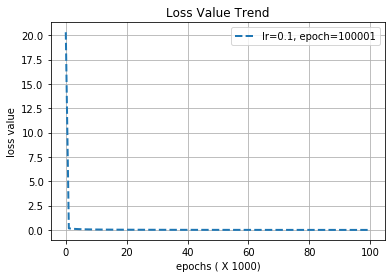

In [9]:
obj2.display_lossval_trend()

In [7]:
test_data = np.array([3, 17, 5, 10])
obj2.predict(test_data)

ValueError: shapes (4,) and (2,1) not aligned: 4 (dim 0) != 2 (dim 0)

In [14]:
test_data = np.array([5, 8])
obj2.predict(test_data)

(array([7.26808809e-05]), 0)

In [15]:
test_data = np.array([7, 21])
obj2.predict(test_data)

(array([1.]), 1)

In [16]:
test_data = np.array([12, 0])
obj2.predict(test_data)

(array([0.36809255]), 0)

In [17]:
obj5 = ClassificationTest(x_data, t_data, 1e-1, 200001)
obj5.train()

ClassificationTest Object is created.

Initial error value =  3.049207322500292 
 Initial W =  [[0.0871293]
 [0.0202184]] 
 , b =  [0.83261985]
step =  0 loss value =  20.294767435720903
step =  1000 loss value =  0.1664047557740782
step =  2000 loss value =  0.13174418052268763
step =  3000 loss value =  0.10901501706899308
step =  4000 loss value =  0.0929194370363145
step =  5000 loss value =  0.08092532422604805
step =  6000 loss value =  0.0716474108396057
step =  7000 loss value =  0.06426081949434419
step =  8000 loss value =  0.058243341896864594
step =  9000 loss value =  0.053248333629927945
step =  10000 loss value =  0.049036743350104
step =  11000 loss value =  0.045438441857560755
step =  12000 loss value =  0.04232909785826624
step =  13000 loss value =  0.03961576814699589
step =  14000 loss value =  0.03722759949522505
step =  15000 loss value =  0.03510964649339493
step =  16000 loss value =  0.03321865266959098
step =  17000 loss value =  0.03152010477717856
step =  

step =  164000 loss value =  0.003683997540993573
step =  165000 loss value =  0.0036619831534839393
step =  166000 loss value =  0.0036402302949917462
step =  167000 loss value =  0.0036187343329711747
step =  168000 loss value =  0.003597490743632938
step =  169000 loss value =  0.0035764951087693397
step =  170000 loss value =  0.0035557431126968116
step =  171000 loss value =  0.003535230539296859
step =  172000 loss value =  0.0035149532691610076
step =  173000 loss value =  0.0034949072768346097
step =  174000 loss value =  0.0034750886281554403
step =  175000 loss value =  0.003455493477679082
step =  176000 loss value =  0.003436118066189911
step =  177000 loss value =  0.0034169587183038655
step =  178000 loss value =  0.0033980118401396218
step =  179000 loss value =  0.0033792739170727384
step =  180000 loss value =  0.0033607415115656904
step =  181000 loss value =  0.003342411261064852
step =  182000 loss value =  0.003324279875965303
step =  183000 loss value =  0.0033063

In [18]:
test_data = np.array([12, 0])
obj5.predict(test_data)

(array([0.27660511]), 0)

In [19]:
test_data = np.array([1, 1])
obj5.predict(test_data)

(array([7.19576463e-18]), 0)

In [20]:
test_data = np.array([2, 2])
obj5.predict(test_data)

(array([2.15526478e-15]), 0)

In [21]:
test_data = np.array([10, 10])
obj5.predict(test_data)

(array([0.99999284]), 1)

In [22]:
test_data = np.array([15, 0])
obj5.predict(test_data)

(array([0.9999586]), 1)

In [23]:
test_data = np.array([14, 1])
obj5.predict(test_data)

(array([0.9997808]), 1)

In [24]:
test_data = np.array([14, 0])
obj5.predict(test_data)

(array([0.99835376]), 1)

In [25]:
test_data = np.array([13, 0])
obj5.predict(test_data)

(array([0.93837738]), 1)

In [26]:
test_data = np.array([0, 0])
obj5.predict(test_data)

(array([2.40244396e-20]), 0)

In [27]:
test_data = np.array([9, 0])
obj5.predict(test_data)

(array([6.05374682e-06]), 0)

In [28]:
test_data = np.array([10, 0])
obj5.predict(test_data)

(array([0.00024103]), 0)

In [29]:
test_data = np.array([11, 0])
obj5.predict(test_data)

(array([0.00951004]), 0)

In [30]:
test_data = np.array([12, 0])
obj5.predict(test_data)

(array([0.27660511]), 0)

In [31]:
test_data = np.array([12, 1])
obj5.predict(test_data)

(array([0.74198749]), 1)

In [34]:
test_data = np.array([4, 11])
obj5.predict(test_data)

(array([0.00026311]), 0)

In [35]:
obj5.get_W_b()

(array([[3.68448758],
        [2.01768868]]),
 array([-45.17521533]))

In [8]:
obj3 = ClassificationTest(x_data, t_data, 1e-2, 20001)
obj3.train()

ClassificationTest Object is created.

Initial error value =  15.534121962505818 
 Initial W =  [[0.43758721]
 [0.891773  ]] 
 , b =  [0.96366276]
step =  0 loss value =  13.507142276132457
step =  1000 loss value =  0.9872453685855429
step =  2000 loss value =  0.6767327560204387
step =  3000 loss value =  0.5405678897833517
step =  4000 loss value =  0.4623542646387213
step =  5000 loss value =  0.4104787809731492
step =  6000 loss value =  0.37287400231722206
step =  7000 loss value =  0.3439323619363839
step =  8000 loss value =  0.3206866124503806
step =  9000 loss value =  0.30141384580012004
step =  10000 loss value =  0.2850413129273148
step =  11000 loss value =  0.27086373275715137
step =  12000 loss value =  0.25839679259257603
step =  13000 loss value =  0.24729588460859028
step =  14000 loss value =  0.23730845394088212
step =  15000 loss value =  0.22824473136966883
step =  16000 loss value =  0.21995903834053582
step =  17000 loss value =  0.2123374372965427
step =  1800

In [11]:
obj4 = ClassificationTest(x_data, t_data, 1, 20001)
obj4.train()

ClassificationTest Object is created.

Initial error value =  15.49958292849021 
 Initial W =  [[0.56804456]
 [0.92559664]] 
 , b =  [0.07103606]
step =  0 loss value =  34.99999982628222
step =  1000 loss value =  34.99999982628222
step =  2000 loss value =  34.99999982628222
step =  3000 loss value =  34.99999982628222
step =  4000 loss value =  34.99999982628222
step =  5000 loss value =  34.99999982628222
step =  6000 loss value =  34.99999982628222
step =  7000 loss value =  34.99999982628222
step =  8000 loss value =  34.99999982628222
step =  9000 loss value =  34.99999982628222
step =  10000 loss value =  34.99999982628222
step =  11000 loss value =  34.99999982628222
step =  12000 loss value =  34.99999982628222
step =  13000 loss value =  34.99999982628222
step =  14000 loss value =  34.99999982628222
step =  15000 loss value =  34.99999982628222
step =  16000 loss value =  34.99999982628222
step =  17000 loss value =  34.99999982628222
step =  18000 loss value =  34.99999982

In [32]:
obj6 = ClassificationTest(x_data, t_data, 1e-3, 80001)
obj6.train()

ClassificationTest Object is created.

Initial error value =  18.241460897668553 
 Initial W =  [[0.77815675]
 [0.87001215]] 
 , b =  [0.97861834]
step =  0 loss value =  18.04772127356661
step =  1000 loss value =  2.0303527845547364
step =  2000 loss value =  1.812111840989692
step =  3000 loss value =  1.6340158091039247
step =  4000 loss value =  1.4878813685034062
step =  5000 loss value =  1.3669171894400574
step =  6000 loss value =  1.2657487028647698
step =  7000 loss value =  1.1802222789936567
step =  8000 loss value =  1.1071565404343258
step =  9000 loss value =  1.0441149142060764
step =  10000 loss value =  0.9892216254643427
step =  11000 loss value =  0.941020993173654
step =  12000 loss value =  0.8983726189197524
step =  13000 loss value =  0.8603741184715124
step =  14000 loss value =  0.8263042448437403
step =  15000 loss value =  0.7955808719480049
step =  16000 loss value =  0.7677297544948752
step =  17000 loss value =  0.7423611118225305
step =  18000 loss valu